### Debugging a Broken Function

#### The first part - time formatting problem

In [1]:
%matplotlib inline

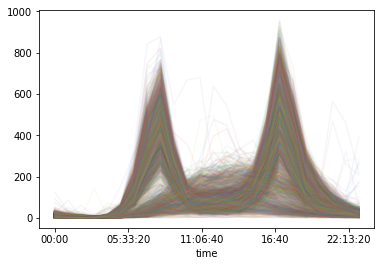

In [2]:
# original code before using TimedataIndex format
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.columns = ['East', 'West']
data['Total'] = data['East'] + data['West']
pivoted= data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=.06)

In [5]:
# checking if plot with hours is as it was before refactoring
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted= data.pivot_table('Total', index=data.index.time, columns=data.index.date)
#pivoted .plot(legend=False, alpha=.06);

'''
The resulting plot was made when get_fremont_data() function have had formatting hours as
'%H'- meaning that times given in 'csv' file were 24 hours format - which wasn't true (12am, 1pm, etc)
Strange plot with mixed hours - there should be 2 peaks like in original(although slow) code.
After making improvment in format('%I' meaning 12hours clock) and kernel restarting all came back to original plot 
back as below was described.
'''

"\nThe resulting plot was made when get_fremont_data() function have had formatting hours as '%H'- meaning that times \ngiven in 'csv' file were 24 hours format - which wasn't true (12am, 1pm, etc)\nStrange plot with mixed hours - there should be 2 peaks like in original(although slow) code.\nAfter making improvment in format('%I' meaning 12hours clock) and kernel restarting all came back to original plot \nas below was described.\n"

In [6]:
pivoted.shape

(24, 2340)

In [4]:
# only hours from 0 to 12 so there is a mix of 'am' and 'pm' times
pivoted.index

# it started when function get_fremont_data() created dataframe with DatetimeIndex formatting
import numpy as np
np.unique(data.index.time)

# checking the original csv file 'Fremont.csv' to see what times has been used in the file - both 'am' and 'pm'
#!head -24 'Fremont.csv'

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

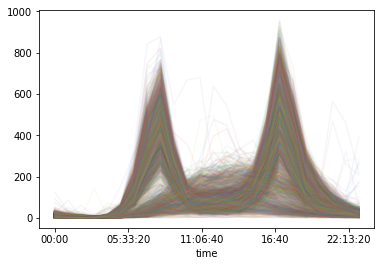

In [9]:
# after changing the format for hours (from %H into %I..??)
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted= data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted .plot(legend=False, alpha=.06)

pivoted.index

#### The second part - Finding and Fixing a scikit-learn bug

In [7]:
# dataframe where each hour is an observation and each observation consists of values 
# for received number of days (they are like 2340 variables)
pivoted.shape

(24, 2340)

In [27]:
# but after using 'T' method the dataframe is changing - each day is a singular observation
# (sample) with 24 columns or variables - to look for relation between days(?)
pivoted.T.shape
x = pivoted.T.values
np.isnan(x).sum() # there are 9 NaNs in dataframe

9

In [32]:
# to make observations betweeen days scikit-sklearn Decomposition component PCA will be used
# it will lessen the number of analyzed observations with saving data trends and characteristics
from sklearn.decomposition import PCA
# to avoid eventual NaN values additional method should be used (0 value is better than NaN)
X = pivoted.fillna(0).T.values
X.shape
PCA(2).fit(X) # PCA(2) means to get two components from the model

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
# to get two-dimmensional X variable 'fit_transform' method is used(n_components=2)
X2 = PCA(2, svd_solver='dense').fit_transform(X)

ValueError: Unrecognized svd_solver='dense'

#### End of part 8